<div style="border-radius:10px; border:black solid; padding: 15px; background-color: Green; font-size:100%; text-align:left">
<p style="font-family:Georgia; font-weight:bold; letter-spacing: 2px; color:white; font-size:200%; text-align:center;padding: 0px;"> Banking Churn Analysis & Modeling.</p></div>

<div align="center">
  <img src="https://m.economictimes.com/thumb/msid-100281493,width-1200,height-900,resizemode-4,imgsize-14062/banks-request-rbi-for-more-time-for-new-loan-provisioning-system.jpg" alt="Image Description" width="300" height="200">
</div>

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Business Objective:</font></h3>
   
- The goal would be to identify which customers are most likely to churn (leave the service) and understand the key factors driving their decision to leave. `Churn Reduction through Predictive Analytics`
- Churn refers to the process by which a customer stops doing business with a company.

<h3 align="left"><font color=brown>📊 Business Value:</font></h3>
- Customer retention is critical for a bank’s profitability. Predicting which customers are likely to churn can help the bank take proactive steps (e.g., offering personalized services or incentives) to retain valuable customers.

## **Import Needded Columns**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid",font_scale=1.5)
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score, confusion_matrix, classification_report

## **Data Representation**

In [2]:
df = pd.read_csv(r'c:\Users\mohamed belal\.cache\kagglehub\datasets\shrutimechlearn\churn-modelling\versions\1\Churn_Modelling.csv')

* **RowNumber**: Index of the row.
* **CustomerId**: Unique identifier for each customer.
* **Surname**: Customer's last name (may not be very useful for analysis).
* **CreditScore**: The credit score of the customer [300 : 850].
    - Poor credit: 300 to 579.
    - Fair credit: 580 to 669.
    - Good credit: 670 to 739.
    - Very good credit: 740 to 799.
    - Excellent credit: 800 to 850.
* **Geography**: Country of the customer (e.g., France, Spain).
* **Gender**: Gender of the customer (e.g., Male, Female).
* **Age**: Age of the customer.
* **Tenure**: Number of years the customer has been with the bank.
* **Balance**: Account balance of the customer.
* **NumOfProducts**: Number of products the customer has purchased.
* **HasCrCard**: Whether the customer has a credit card (1 = Yes, 0 = No).
* **IsActiveMember**: Whether the customer is an active member (1 = Yes, 0 = No).
* **EstimatedSalary**: Estimated annual salary of the customer.
* **Exited**: Whether the customer left the bank (1 = Yes, 0 = No) — this is likely the target for churn prediction.

## **Data Wrangling**

**Check Duplicated Values**

In [3]:
df.duplicated().sum()

np.int64(0)

**Check Missing Values**

In [4]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## **Data Preprocessing**

**Drop Unneeded Columns**

In [5]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

**Define Features `X` and Target `y`**

In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

**Data Encoding**

**To apply encoding to categorical columns in your dataset, the type of encoding will depend on whether the categorical variables are nominal (unordered) or ordinal (ordered)**

In [7]:
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=False)

In [8]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True,True,False


**Data Scaling**

In [9]:
# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to numerical columns
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

**Data Splitting**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Data Balancing**
- We can apply SMOTE model to balance the data.

In [11]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check the new shapes of the resampled data
print("Resampled X_train shape:", X_train.shape)
print("Resampled y_train shape:", y_train.shape)

Resampled X_train shape: (12712, 13)
Resampled y_train shape: (12712,)


## **Machine Learning Models**

**Logistic Regression model**

In [12]:
lr = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)

# Train the model
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [13]:
# Train Score
print(lr.score(X_train, y_train))

0.7347388294524858


In [14]:
# Test Score
print(lr.score(X_test, y_test))

0.739


In [15]:
# Make predictions on the test set
y_pred = lr.predict(X_test)

In [16]:
# Get our metrics
lr_acc = accuracy_score(y_test, y_pred)
lr_per = precision_score(y_test, y_pred)
lr_rec = recall_score(y_test, y_pred)

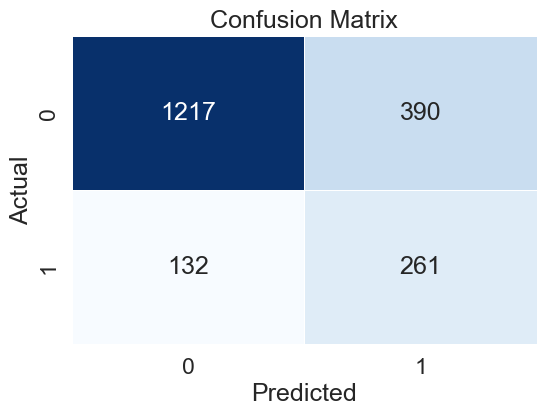

In [17]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**SVC Model**

In [18]:
# Define hyperparameter grid
param_grid = {'kernel': ['linear', 'poly', 'rbf'],
              'C': [0.1, 1, 10]}

svm = SVC()

In [ ]:
# Perform Grid Search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X, y)

In [ ]:
# Get best model
best_model = grid_search.best_estimator_
best_model

SVC(C=10)

In [ ]:
# Train Score
print(best_model.score(X_train, y_train))

0.7507079924480805


In [ ]:
# Test Score
print(best_model.score(X_test, y_test))

0.882


In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
# Get our metrics
svc_acc = accuracy_score(y_test, y_pred)
svc_per = precision_score(y_test, y_pred)
svc_rec = recall_score(y_test, y_pred)

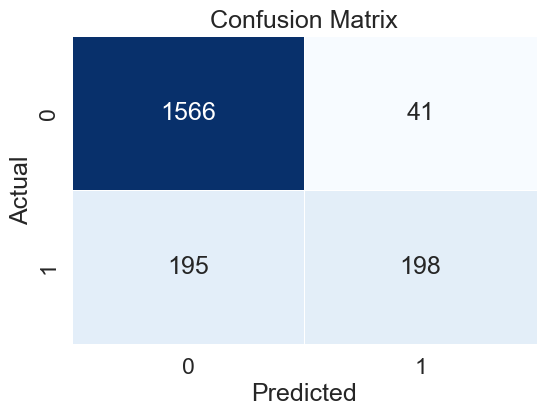

In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**K-Neighbors Classifier**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print(knn.score(X_train, y_train))

0.9323473882945249


In [ ]:
print(knn.score(X_test, y_test))

0.7705


In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
# Get our metrics
knn_acc = accuracy_score(y_test, y_pred)
knn_per = precision_score(y_test, y_pred)
knn_rec = recall_score(y_test, y_pred)

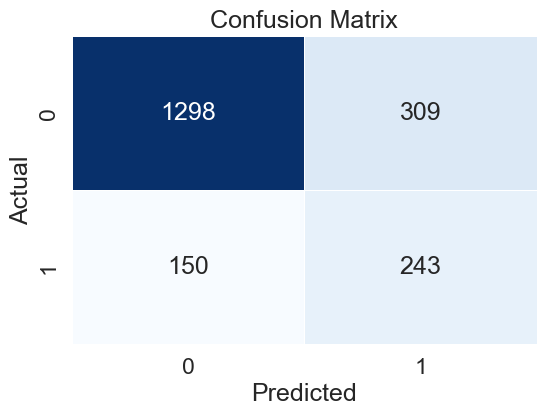

In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision tree Classifier


In [ ]:
clf = DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.01, random_state=42)

# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_impurity_decrease=0.01, random_state=42)

In [ ]:
# Train Score
print(clf.score(X_train, y_train))

0.7178256765261171


In [ ]:
# Test Score
print(clf.score(X_test, y_test))

0.743


In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Get our metrics
clf_acc = accuracy_score(y_test, y_pred)
clf_per = precision_score(y_test, y_pred)
clf_rec = recall_score(y_test, y_pred)

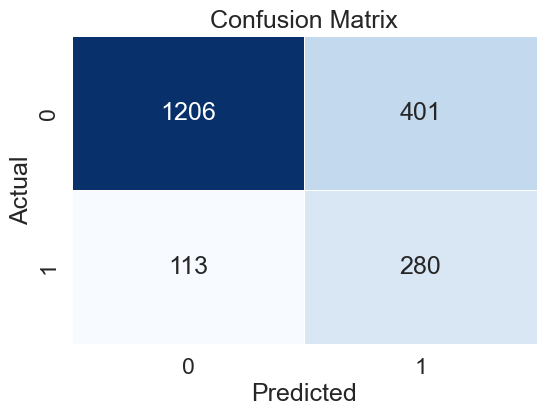

In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**RandomForestClassifier Model**

In [ ]:
RF_classifier = RandomForestClassifier(n_estimators=100, min_impurity_decrease=0.01)

RF_classifier.fit(X_train, y_train)

RandomForestClassifier(min_impurity_decrease=0.01)

In [ ]:
# Train score
RF_classifier.score(X_train, y_train)

0.7660478288231592

In [ ]:
# Test score
RF_classifier.score(X_test, y_test)

0.7715

In [ ]:
# Get prediction
y_pred = RF_classifier.predict(X_test)

In [ ]:
# Get our metrics
rf_acc = accuracy_score(y_test, y_pred)
rf_per = precision_score(y_test, y_pred)
rf_rec = recall_score(y_test, y_pred)

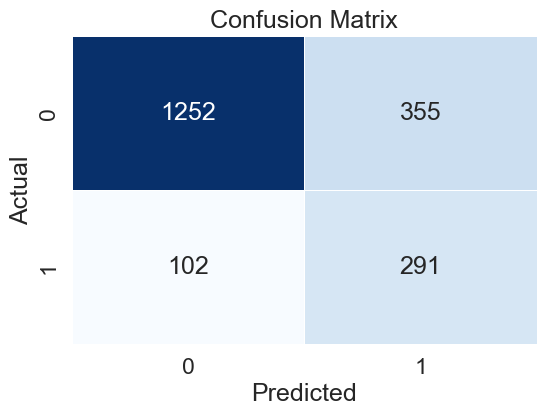

In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Bagging Classifier**

In [ ]:
# Create a base decision tree classifier
base_classifier = DecisionTreeClassifier(min_impurity_decrease=0.01)

# Create a bagging classifier with decision trees
bagged_classifier = BaggingClassifier(base_classifier, n_estimators=10)

# Train the bagged classifier on your data
bagged_classifier.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(min_impurity_decrease=0.01))

In [ ]:
bagged_classifier.score(X_train, y_train)

0.7279735682819384

In [ ]:
bagged_classifier.score(X_test, y_test)

0.746

In [ ]:
# Make predictions
y_pred = bagged_classifier.predict(X_test)

In [ ]:
# Get our metrics
bag_acc = accuracy_score(y_test, y_pred)
bag_per = precision_score(y_test, y_pred)
bag_rec = recall_score(y_test, y_pred)

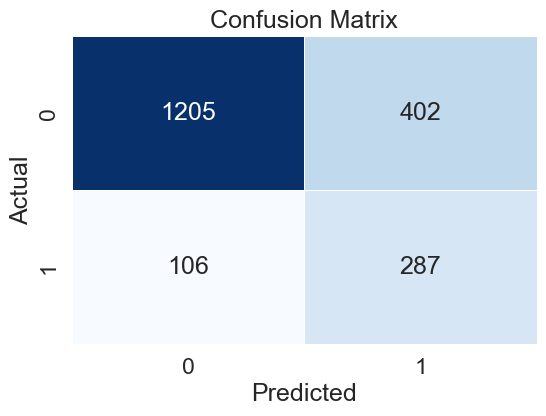

In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**ExtraTreesClassifier**

In [ ]:
# ExtraTreeClassifier Model
ET_classifier = ExtraTreesClassifier(n_estimators=100, min_impurity_decrease=0.01)

ET_classifier.fit(X_train, y_train)

ExtraTreesClassifier(min_impurity_decrease=0.01)

In [ ]:
# Train score
ET_classifier.score(X_train, y_train)

0.75558527375708

In [ ]:
# Test score
ET_classifier.score(X_test, y_test)

0.738

In [ ]:
# Get prediction
y_pred_et = ET_classifier.predict(X_test)

In [ ]:
# Get our metrics
et_acc = accuracy_score(y_test, y_pred_et)
et_per = precision_score(y_test, y_pred_et)
et_rec = recall_score(y_test, y_pred_et)

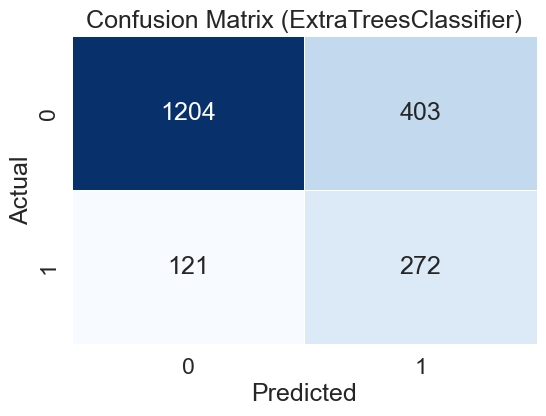

In [ ]:
# Create a confusion matrix for ExtraTreeClassifier
conf_matrix_et = confusion_matrix(y_test, y_pred_et)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_et, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix (ExtraTreesClassifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**AdaBoostClassifier**

In [ ]:
# Create AdaBoostClassifier Model
AB_classifier = AdaBoostClassifier(n_estimators=100)

AB_classifier.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [ ]:
# Train score
AB_classifier.score(X_train, y_train)

0.8001887979861548

In [ ]:
# Test score
AB_classifier.score(X_test, y_test)

0.79

In [ ]:
# Get prediction
y_pred_ab = AB_classifier.predict(X_test)

In [ ]:
# Get our metrics
ada_acc = accuracy_score(y_test, y_pred_ab)
ada_per = precision_score(y_test, y_pred_ab)
ada_rec = recall_score(y_test, y_pred_ab)

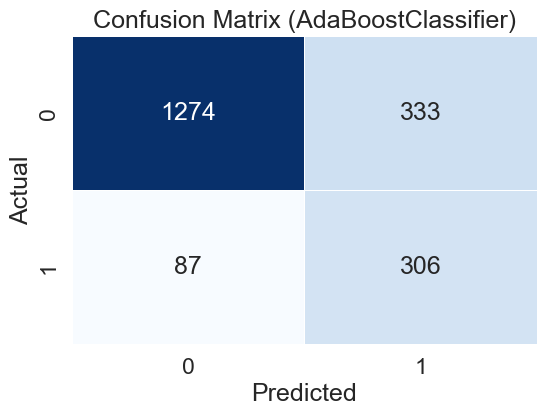

In [ ]:
# Create a confusion matrix for AdaBoostClassifier
conf_matrix_ab = confusion_matrix(y_test, y_pred_ab)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_ab, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix (AdaBoostClassifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**XGBClassifier Model**

In [ ]:
# Create XGBClassifier Model
XGB_classifier = XGBClassifier(n_estimators=200)

XGB_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Train score
XGB_classifier.score(X_train, y_train)

0.9907960981749528

In [ ]:
# Test score
XGB_classifier.score(X_test, y_test)

0.85

In [ ]:
# Get prediction
y_pred_xgb = XGB_classifier.predict(X_test)

In [ ]:
# Get our metrics
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_per = precision_score(y_test, y_pred_xgb)
xgb_rec = recall_score(y_test, y_pred_xgb)

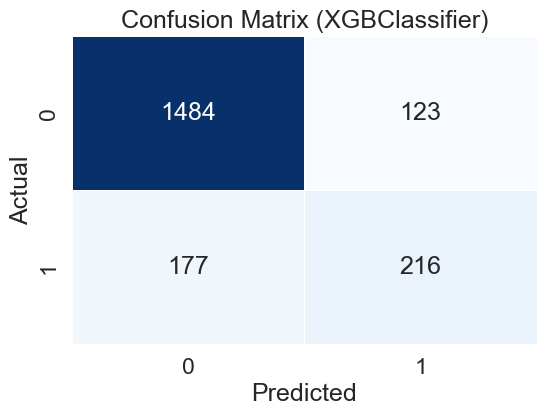

In [ ]:
# Create a confusion matrix for XGBClassifier
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix (XGBClassifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**CatBoostClassifier**

In [ ]:
# Create CatBoostClassifier Model
CatBoost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)

CatBoost_classifier.fit(X_train, y_train)

0:	learn: 0.6558267	total: 2.4ms	remaining: 238ms
1:	learn: 0.6255105	total: 4.53ms	remaining: 222ms
2:	learn: 0.5982135	total: 6.55ms	remaining: 212ms
3:	learn: 0.5770468	total: 8.63ms	remaining: 207ms
4:	learn: 0.5574059	total: 10.6ms	remaining: 202ms
5:	learn: 0.5409078	total: 12.6ms	remaining: 197ms
6:	learn: 0.5286026	total: 14.5ms	remaining: 193ms
7:	learn: 0.5175871	total: 16.4ms	remaining: 189ms
8:	learn: 0.5075543	total: 18.4ms	remaining: 186ms
9:	learn: 0.4978898	total: 20.4ms	remaining: 184ms
10:	learn: 0.4893603	total: 22.3ms	remaining: 181ms
11:	learn: 0.4823757	total: 24.4ms	remaining: 179ms
12:	learn: 0.4765072	total: 26.4ms	remaining: 176ms
13:	learn: 0.4699200	total: 28.4ms	remaining: 174ms
14:	learn: 0.4641558	total: 30.4ms	remaining: 172ms
15:	learn: 0.4591027	total: 32.4ms	remaining: 170ms
16:	learn: 0.4556529	total: 34.5ms	remaining: 169ms
17:	learn: 0.4506462	total: 36.5ms	remaining: 166ms
18:	learn: 0.4472239	total: 38.7ms	remaining: 165ms
19:	learn: 0.4445149	to

In [ ]:
# Train score
CatBoost_classifier.score(X_train, y_train)

np.float64(0.8654027690371303)

In [ ]:
# Test score
CatBoost_classifier.score(X_test, y_test)

np.float64(0.8415)

In [ ]:
# Get prediction
y_pred_catboost = CatBoost_classifier.predict(X_test)

In [ ]:
# Get our metrics
cat_acc = accuracy_score(y_test, y_pred_catboost)
cat_per = precision_score(y_test, y_pred_catboost)
cat_rec = recall_score(y_test, y_pred_catboost)

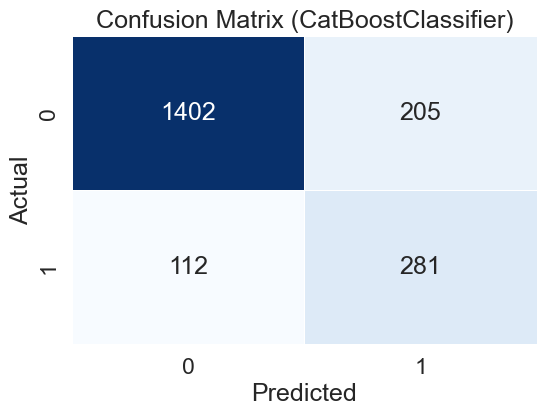

In [ ]:
# Create a confusion matrix for CatBoostClassifier
conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_catboost, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix (CatBoostClassifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**LGBMClassifier**

In [ ]:
# Create LGBMClassifier Model
LGBM_classifier = LGBMClassifier(n_estimators=200)
LGBM_classifier.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 6356, number of negative: 6356
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1294
[LightGBM] [Info] Number of data points in the train set: 12712, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(n_estimators=200)

In [ ]:
# Train score
LGBM_classifier.score(X_train, y_train)

0.96019509125236

In [ ]:
# Test score
LGBM_classifier.score(X_test, y_test)

0.866

In [ ]:
# Get prediction
y_pred_lgbm = LGBM_classifier.predict(X_test)

In [ ]:
# Get our metrics
lgbm_acc = accuracy_score(y_test, y_pred_lgbm)
lgbm_per = precision_score(y_test, y_pred_lgbm)
lgbm_rec = recall_score(y_test, y_pred_lgbm)

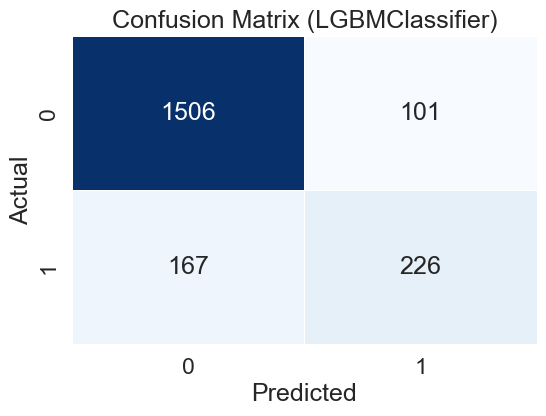

In [ ]:
# Create a confusion matrix for LGBMClassifier
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Confusion Matrix (LGBMClassifier)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

true negative  |  false positive 




false negative | true positive

### **Evaluation**

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Key Metrics:</font></h3>
    
- **`Accuracy:`**
    - Measures the overall correctness of the model (the percentage of correct predictions).
    - Accuracy is not the most important metric in imbalanced datasets, as it can be misleading. For example, predicting the majority class most of the time will give high accuracy but poor performance on the minority class (churners).


- **`Precision:`**
    - Precision answers the question: Of all the customers predicted to churn, how many actually churned?
    - High precision means fewer false positives (customers predicted to churn but actually don’t).


- **`Recall:`**
    - Recall answers the question: Of all the customers that actually churned, how many did the model correctly identify?
    - High recall means fewer false negatives (customers that churn but were predicted not to).

In [ ]:
Models = ['LogisticRegression', 'SVC', 'KNN', 'DecisiontreeClassifier','RandomForestClassifier', 'BaggingClassifier',
         'ExtraTreesClassifier', 'XGBoostClassifier', 'AdaBoostClassifier', 'CatBoostClassifier', 'LGBMClassifier']
Accuracy = [lr_acc, svc_acc, knn_acc, clf_acc, rf_acc, bag_acc, et_acc, xgb_acc, ada_acc, cat_acc, lgbm_acc]
Precision = [lr_per, svc_per, knn_per, clf_per, rf_per, bag_per, et_per, xgb_per, ada_per, cat_per, lgbm_per]
Recall = [lr_rec, svc_rec, knn_rec, clf_rec, rf_rec, bag_rec, et_rec, xgb_rec, ada_rec, cat_rec, lgbm_rec]

models = pd.DataFrame(data={'Models': Models,'Accuracy': Accuracy, 'Precision': Precision, 'Recall': Recall})
models

,Models,Accuracy,Precision,Recall
0,LogisticRegression,0.7390,0.400922,0.664122
1,SVC,0.8820,0.828452,0.503817
2,KNN,0.7705,0.440217,0.618321
3,DecisiontreeClassifier,0.7430,0.411160,0.712468
4,RandomForestClassifier,0.7715,0.450464,0.740458
5,BaggingClassifier,0.7460,0.416546,0.730280
6,ExtraTreesClassifier,0.7380,0.402963,0.692112
7,XGBoostClassifier,0.8500,0.637168,0.549618
8,AdaBoostClassifier,0.7900,0.478873,0.778626
9,CatBoostClassifier,0.8415,0.578189,0.715013


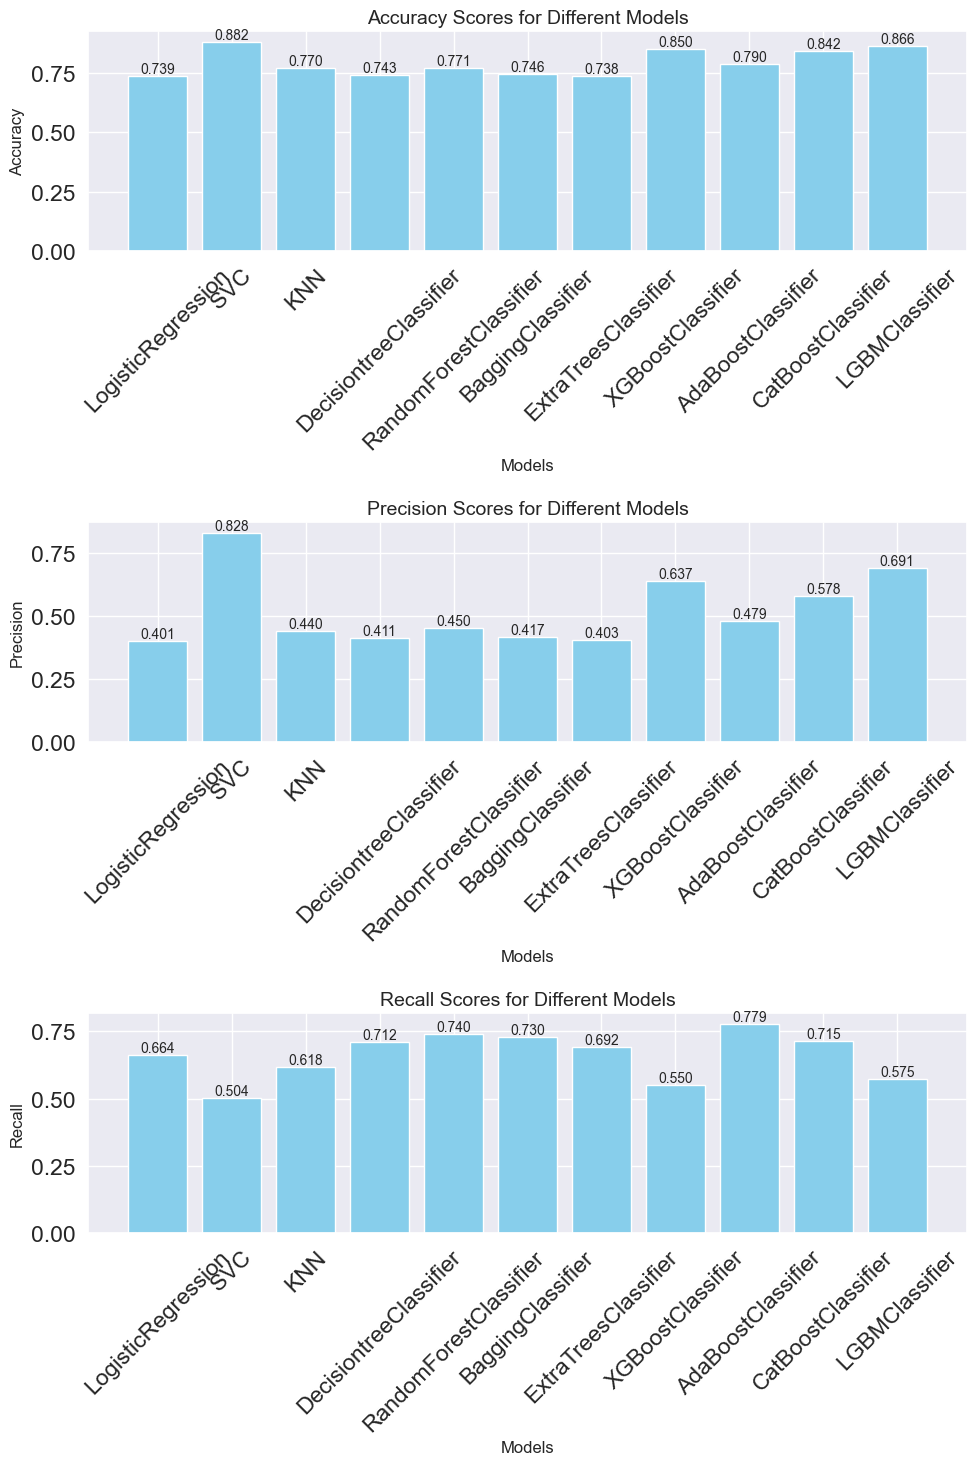

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(3, 1, figsize=(10, 15))  # 3 rows, 1 column

# List of metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall']

# Loop through each metric and plot on its own axis
for i, metric in enumerate(metrics):
    # Plot the bar chart
    bars = ax[i].bar(models['Models'], models[metric], color='skyblue')
    
    # Add title, labels, and rotate x-axis labels
    ax[i].set_title(f'{metric} Scores for Different Models', fontsize=14)
    ax[i].set_xlabel('Models', fontsize=12)
    ax[i].set_ylabel(metric, fontsize=12)
    ax[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
    
    # Annotate each bar with its score
    for bar in bars:
        height = bar.get_height()  # Get the height of the bar
        ax[i].text(
            bar.get_x() + bar.get_width() / 2,  # x-coordinate of the text (center of the bar)
            height,  # y-coordinate of the text (top of the bar)
            f'{height:.3f}',  # Format the score to 3 decimal places
            ha='center',  # Horizontal alignment of the text
            va='bottom',  # Vertical alignment of the text
            fontsize=10  # Font size of the text
        )

# Adjust layout
plt.tight_layout()
plt.show()